# GloFAS historical

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import climetlab as cml
import xarray as xr
from climetlab_cems_flood.utils import get_po_basin
from matplotlib import pyplot as plt

In [3]:
import pandas as pd 

In [4]:
from collections.abc import Iterable

In [5]:
from climetlab.mergers import XarrayConcatMerger

class MyMerger():
    def __init__(self, *args, **kwargs):
        pass
    def to_xarray(self, paths, **kwargs):
        return xr.open_mfdataset(paths, combine='nested', concat_dim="spfid")

In [6]:
# gdf = get_po_basin()
# gdf_diss = gdf.dissolve()
# gdf_diss.plot()

# minx, miny, maxx, maxy = gdf.unary_union.bounds

# bbox = [maxy, minx,miny, maxx] 
#rhine = {'name':'rhine', 'area':[50.972204,5.450796, 46.296530, 11.871059]} # Ryne
#po = {'name':'po', 'area':bbox} # Po

In [7]:

ps = {'name':'pontelagoscuro','lat':44.886111, 'lon':11.604444}
cm = {'name':'casale-monferrato','lat':45.142222, 'lon':8.447500} # casale monferrato po
ca = {'name':'canonica-dadda', 'lat':45.576944, 'lon':9.534722} # canonica d'adda


In [8]:
hist = cml.load_dataset(
            'glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            temporal_filter= '* 05-09 *',
            variable="river_discharge_in_the_last_24_hours",
            coords=[ps,cm,ca],
            #area = [rhine, po]
            split_on = ['coords', ('hyear',1)],
            threads = 24
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


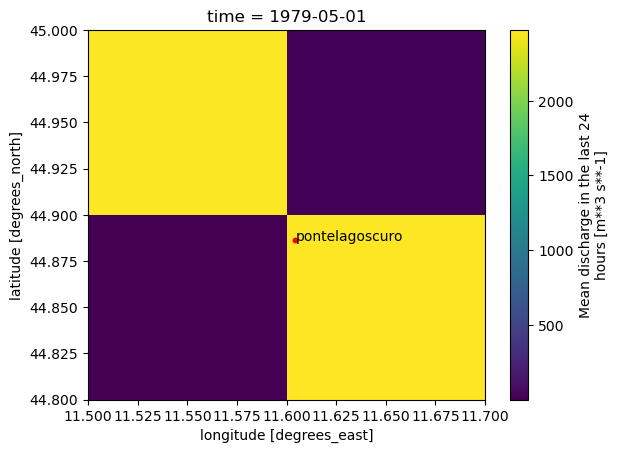

In [16]:
hist.show_coords('ponte')

In [17]:
hist.to_netcdf("/data/temp/nc", "ml")

In [10]:
from pathlib import Path
fp = Path("/data/temp/nc").glob("ml*ponte*.nc")

In [11]:
ds = xr.open_mfdataset(fp)

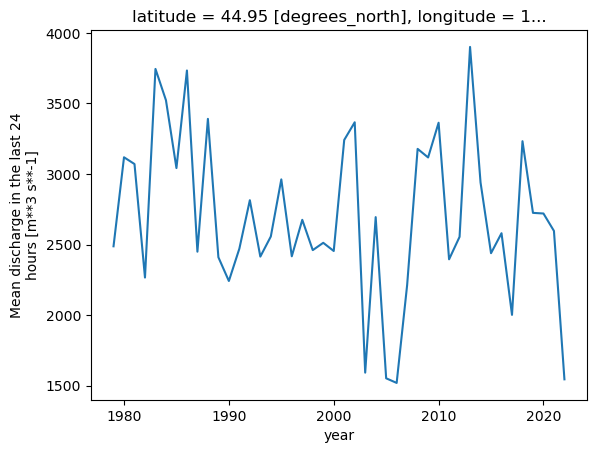

In [15]:
ds.dis24.isel(latitude=0,longitude=0).isel(time=ds.time.dt.month.isin([5,6,7])).groupby("time.year").mean().plot()